In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**Exploratory Data Analysis**

In [ ]:
heart_df=pd.read_csv('/content/heart.csv')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(heart_df.dtypes)
print(heart_df.isnull().sum())
print(heart_df.describe())

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
5

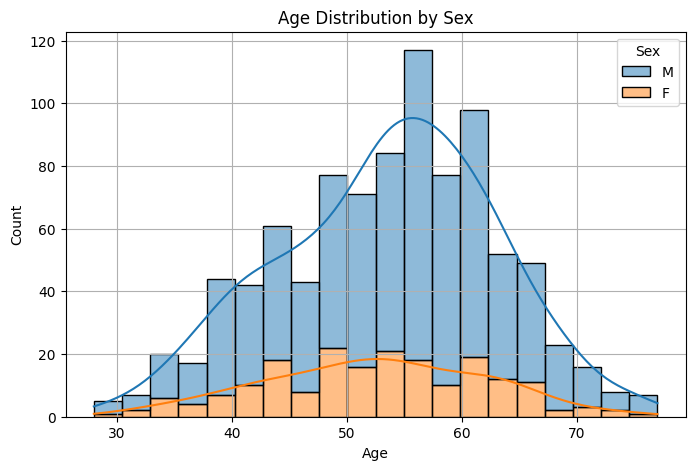

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=heart_df, x='Age', hue='Sex', multiple='stack', kde=True, bins=20)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

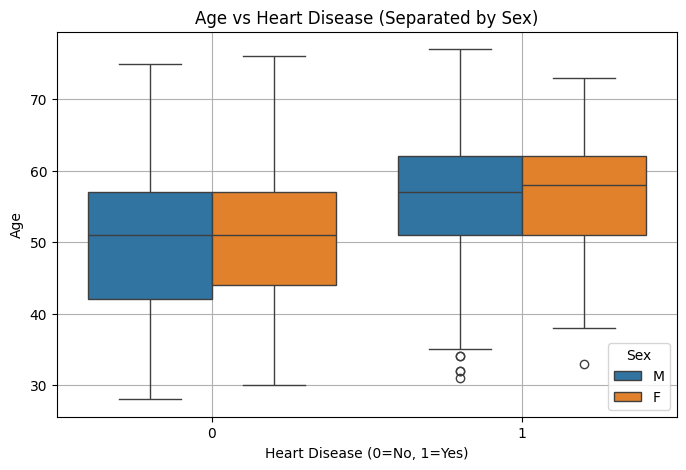

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=heart_df, x='HeartDisease', y='Age', hue='Sex')
plt.title('Age vs Heart Disease (Separated by Sex)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

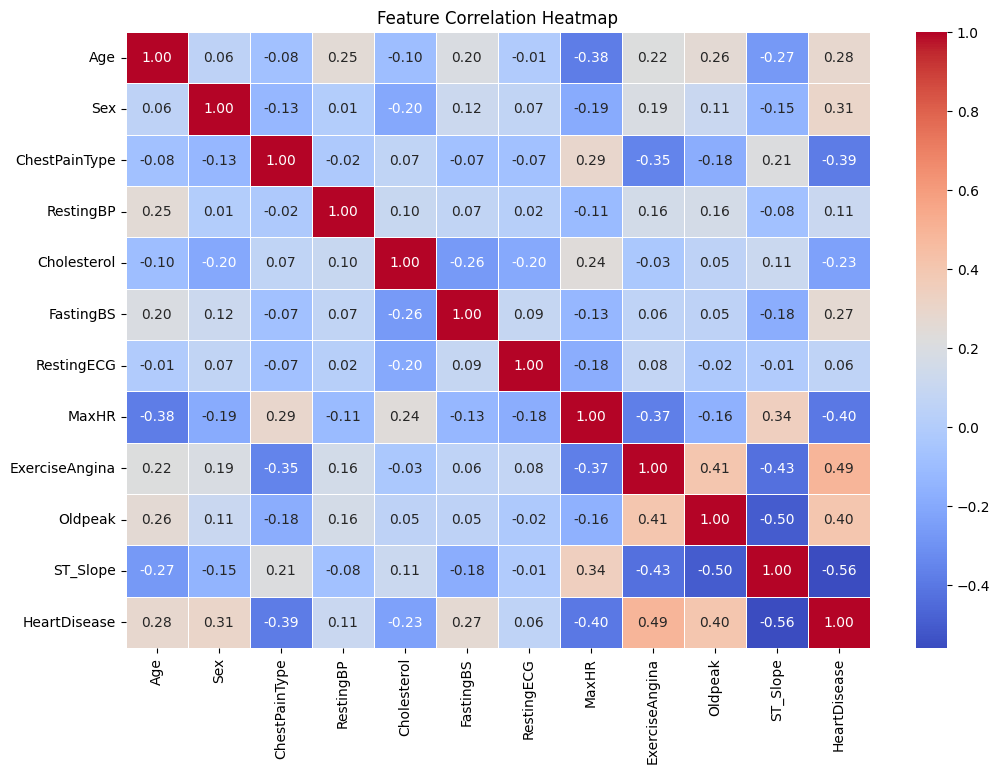

In [ ]:
df_corr = heart_df.copy()
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_corr[cat_cols] = df_corr[cat_cols].apply(LabelEncoder().fit_transform)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok --quiet
!ngrok config add-authtoken 2vzFp5HrI0CizGsMQ89ybco8k4I_7bJyNTwHsTv93Xf3fg4vh

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import subprocess
import time
from pyngrok import ngrok
!pkill streamlit

# Start Streamlit in background
process = subprocess.Popen(["streamlit", "run", "app.py"])

# Wait for Streamlit to fully start
time.sleep(10)  # This delay is CRUCIAL

# Now start ngrok tunnel
public_url = ngrok.connect(addr="http://localhost:8501")
print("🚀 Streamlit is live at:", public_url)

🚀 Streamlit is live at: NgrokTunnel: "https://62cd-34-69-98-20.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill streamlit
!pkill ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

st.set_page_config(page_title="Heart Disease Dashboard", layout="wide")

st.title("💓 Heart Disease Prediction Dashboard")

# Upload
st.sidebar.header("Upload CSV")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("Data successfully uploaded!")

    st.subheader("📄 Dataset Preview")
    st.dataframe(df.head())

    # Check for missing
    st.subheader("🔍 Missing Values")
    st.write(df.isnull().sum())

    # Visuals
    st.subheader("📊 Visualizations")

    col1, col2 = st.columns(2)

    with col1:
        st.markdown("**Age vs HeartDisease (Hue = Sex)**")
        fig = plt.figure(figsize=(5,3))
        sns.histplot(data=df, x="Age", hue="Sex", multiple="stack", kde=True)
        st.pyplot(fig)

        st.markdown("**Chest Pain Type vs Heart Disease**")
        fig = plt.figure(figsize=(5,3))
        sns.countplot(data=df, x="ChestPainType", hue="HeartDisease")
        st.pyplot(fig)

    with col2:
        st.markdown("**Boxplot of Cholesterol by HeartDisease**")
        fig = plt.figure(figsize=(5,3))
        sns.boxplot(data=df, x="HeartDisease", y="Cholesterol")
        st.pyplot(fig)

        st.markdown("**Correlation Heatmap**")
        df_encoded = df.copy()
        for col in df_encoded.select_dtypes(include="object").columns:
            df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
        fig = plt.figure(figsize=(6,4))
        sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        st.pyplot(fig)

    # Preprocess
    st.subheader("🧪 Model Training")
    df_model = df.copy()
    label_cols = df_model.select_dtypes(include="object").columns
    for col in label_cols:
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

    X = df_model.drop("HeartDisease", axis=1)
    y = df_model["HeartDisease"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    st.code(classification_report(y_test, y_pred))

    # Feature Importance
    st.subheader("📌 Feature Importance")
    feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    st.bar_chart(feat_imp)

    # Prediction from User Input
    st.sidebar.header("🔮 Predict Heart Disease")
    user_input = {}
    for col in X.columns:
        if df[col].dtype == object:
            user_input[col] = st.sidebar.selectbox(col, df[col].unique())
        else:
            user_input[col] = st.sidebar.number_input(col, float(df[col].min()), float(df[col].max()), float(df[col].mean()))

    input_df = pd.DataFrame([user_input])
    for col in label_cols:
        input_df[col] = LabelEncoder().fit(df[col]).transform(input_df[col])

    pred = clf.predict(input_df)[0]
    st.sidebar.markdown(f"### 🩺 Prediction: {'May Have Heart Disease' if pred == 1 else 'Healthy'}")

else:
    st.info("👈 Please upload your heart disease dataset CSV to begin.")


Writing app.py
